<a href="https://colab.research.google.com/github/Siddha-Regilla/Data-Science-Classroom-notebooks/blob/main/20.%20KNN_%26_Grid_Search_CV_18_03_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier # KNN Classification

In [2]:
# Upload the dataset - pima-indians-diabetes.data.csv
# Read the dataset
filename = 'pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
# Divide the data into independant variables and target variable
X = array[:, 0:8]
Y = array[:, 8]

In [3]:
# Dividing the data into smaller sub samples - kfolds
num_folds = 10
kfold = KFold(n_splits=10)

In [4]:
# Building the knn model with k = 17
model = KNeighborsClassifier(n_neighbors=17)
# finding the accurarcy of each fold of kfolds for the knn model using cross validation code
results = cross_val_score(model, X, Y, cv=kfold)

In [5]:
# finding the mean of all the kfold accurarcy
print(results.mean())

0.7565276828434724


### Grid Search for Algorithm Tuning

In [8]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV # helps select the best k value for knn

In [9]:
#Read the dataset
filename = 'pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values
# divide the dataset into individual variables and target variables
X = array[:, 0:8]
Y = array[:, 8]

In [10]:
# trying to create a model with different k values to find out the best k value
# creating the dictionary with selected range of k values to be tested with
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [11]:
# building the model and using grid search cv to find out the best k value
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [12]:
# finding out the accurarcy of the model and the best k value
print(grid.best_score_)
print(grid.best_params_)

0.7578558696205755
{'n_neighbors': 14}


In [13]:
# therefore, 14 is the best knn value to classify the data as accurately as possible

### Visualizing the CV results

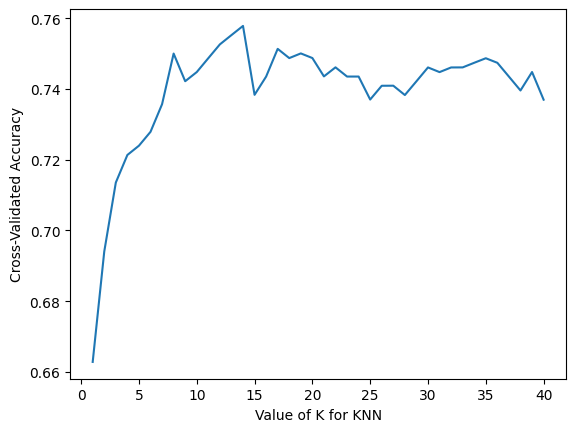

In [14]:
# plotting all the k valiues and their corresponding accuracies to compare and visualize
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()